# Exploratory Data Analysis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #display all columns of the pandas dataframe

import matplotlib.pyplot as plt

import my_tools

In [2]:
# load and clean training data, split into test and train
df, df_test = my_tools.load_clean_data('train')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sell_date
1251,1252,120,RL,70.049958,3136,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,Wd Shng,Stone,163.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1405,1405,GasA,Ex,Y,SBrkr,1405,0,0,1405,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2003.0,RFn,2,478,TA,TA,Y,148,36,0,0,0,0,0,3,2006,WD,Normal,171750,2006-03
586,587,30,RL,55.000000,10267,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,1Fam,1Story,6,7,1918,2000,Gable,CompShg,Stucco,Wd Shng,None,0.0,TA,Gd,BrkTil,TA,Gd,Mn,Rec,210,ALQ,606,0,816,GasA,Ex,Y,SBrkr,838,0,0,838,1,0,1,0,2,1,Fa,5,Typ,0,NA,Detchd,1961.0,Fin,1,275,TA,TA,N,0,0,112,0,0,0,0,5,2008,WD,Normal,130000,2008-05
245,246,20,RL,80.000000,10400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1988,1988,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,102.0,TA,TA,CBlock,Gd,TA,Av,GLQ,929,Unf,0,916,1845,GasA,Gd,Y,SBrkr,1872,0,0,1872,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1988.0,Fin,2,604,TA,TA,Y,197,39,0,0,0,0,0,6,2006,WD,Normal,241500,2006-06
1215,1216,20,RL,99.000000,7094,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,180,LwQ,374,340,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,3,1,TA,5,Typ,0,NA,Detchd,1966.0,RFn,1,384,TA,TA,Y,0,0,0,0,0,0,0,5,2007,WD,Normal,125000,2007-05
20,21,60,RL,101.000000,14215,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,0,11,2006,New,Partial,325300,2006-11


### How have sale prices changed over time?

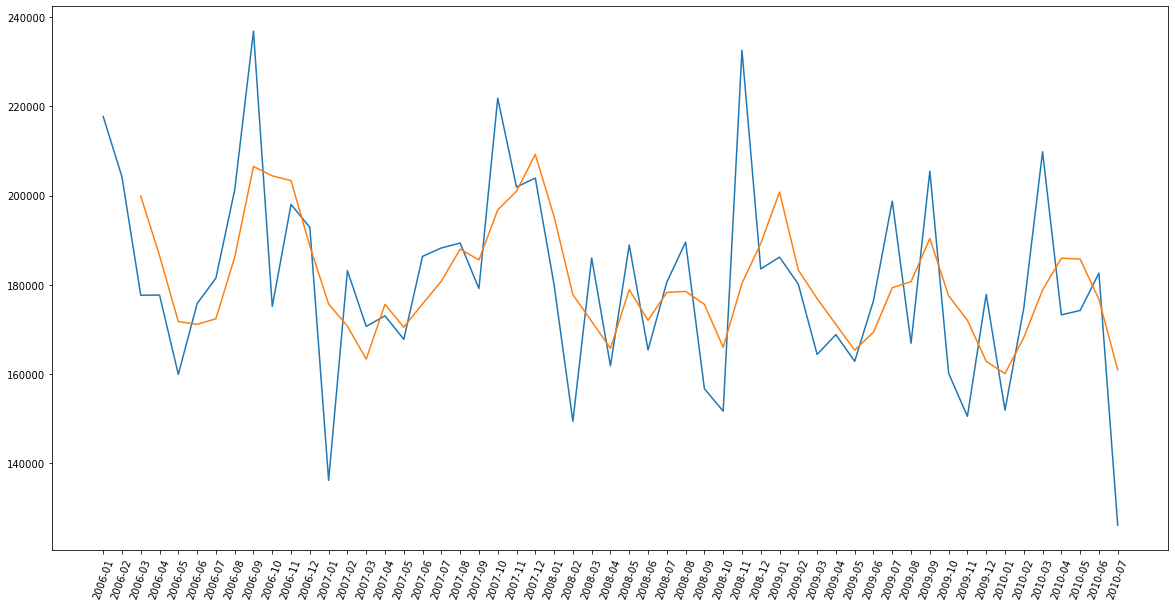

In [4]:
# monthly average
df_chrono = df.groupby(['sell_date']).mean()[['SalePrice']]
# three-month moving average
df_chrono['moving_av'] = df_chrono.rolling(window=3).mean()

plt.figure(figsize=(20,10))
plt.plot(df_chrono)
plt.xticks(rotation=70)

plt.show()

House prices seem to steadily decrease over time, with apparent upticks during fall and winter.

### Which single features correlate best with sale price?

In [8]:
df.corr().SalePrice.sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.788511
GrLivArea       0.707049
GarageCars      0.641411
TotalBsmtSF     0.624126
GarageArea      0.620831
1stFlrSF        0.603684
FullBath        0.557164
YearBuilt       0.539333
YearRemodAdd    0.529615
TotRmsAbvGrd    0.523977
Fireplaces      0.461726
MasVnrArea      0.448841
BsmtFinSF1      0.380246
LotFrontage     0.328582
OpenPorchSF     0.328390
2ndFlrSF        0.316761
WoodDeckSF      0.308439
HalfBath        0.302306
LotArea         0.245008
Name: SalePrice, dtype: float64

### View distributions of numeric features

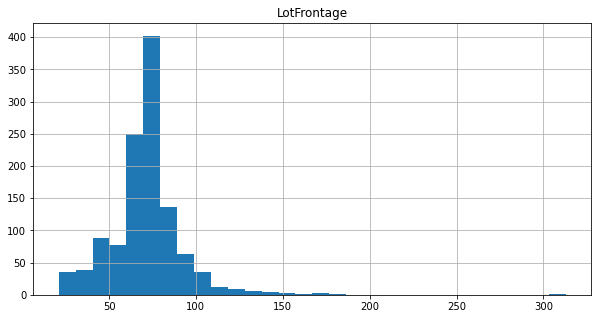

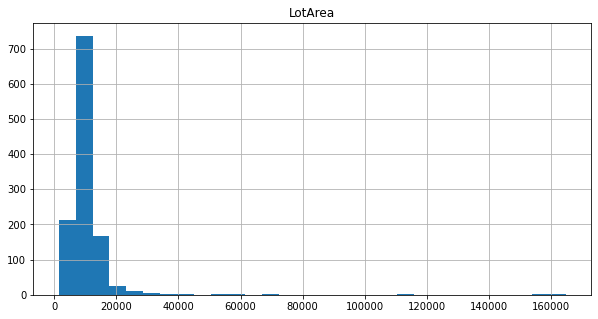

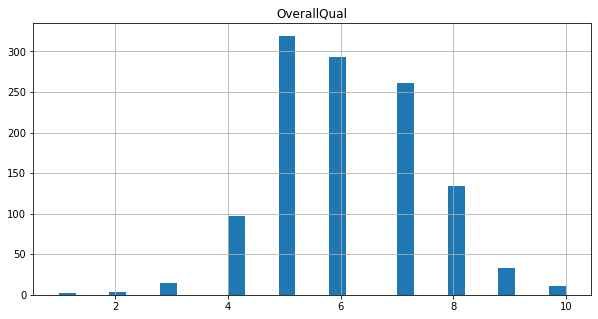

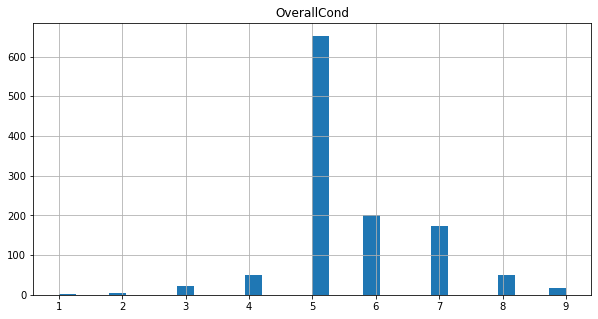

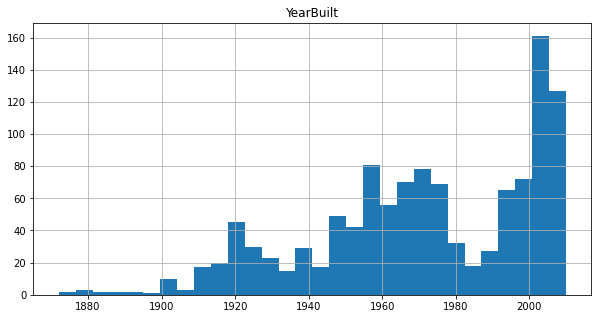

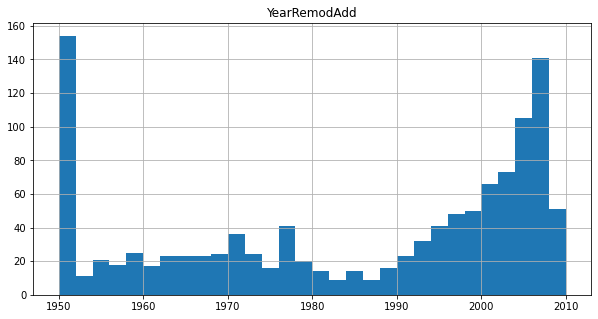

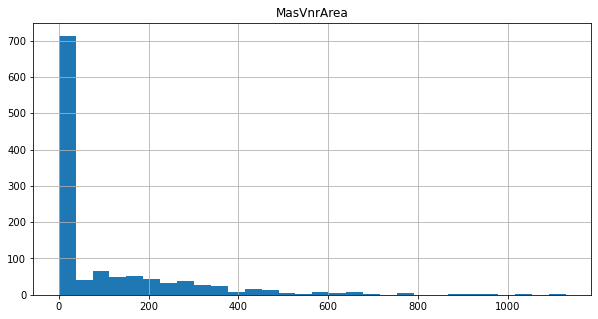

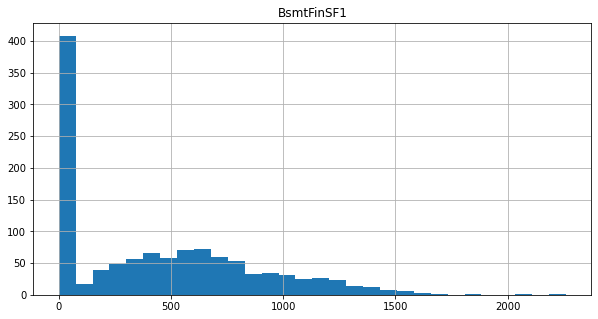

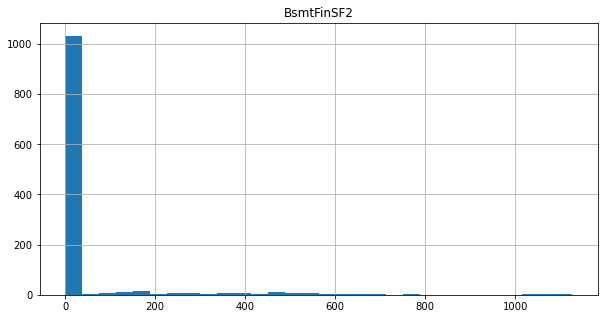

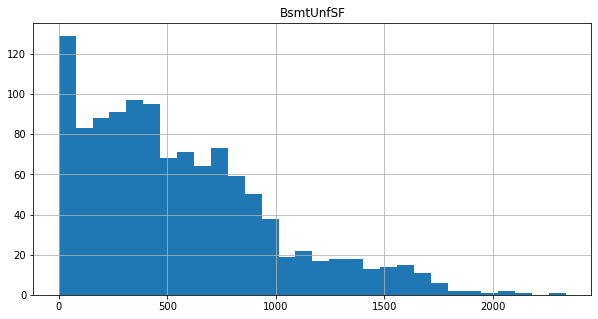

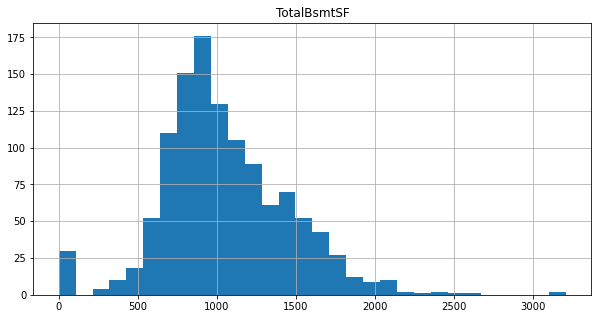

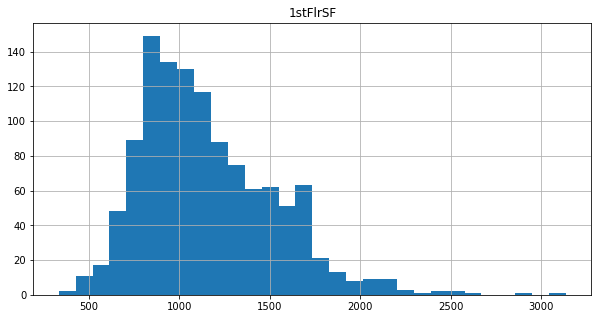

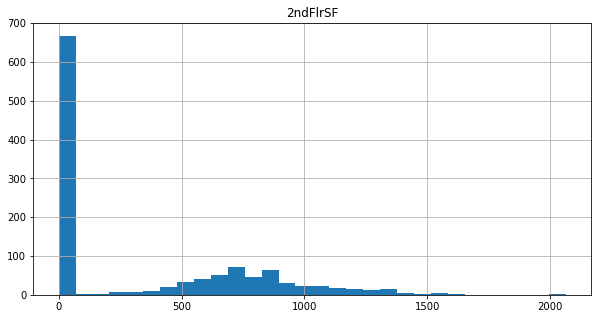

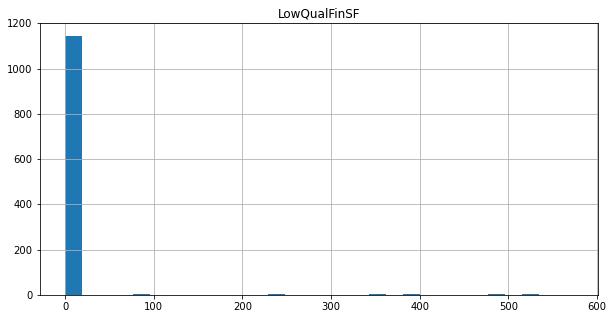

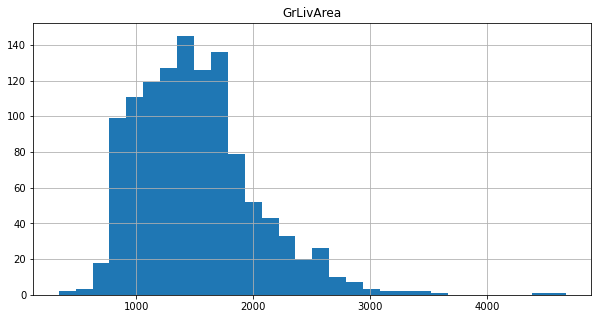

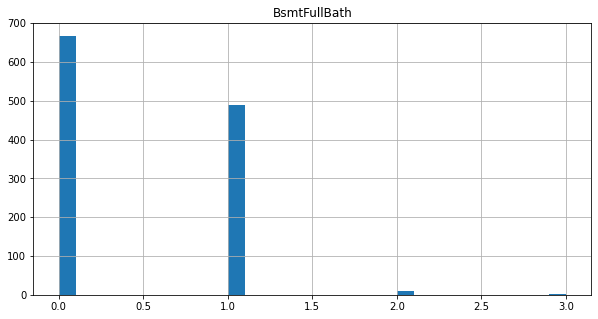

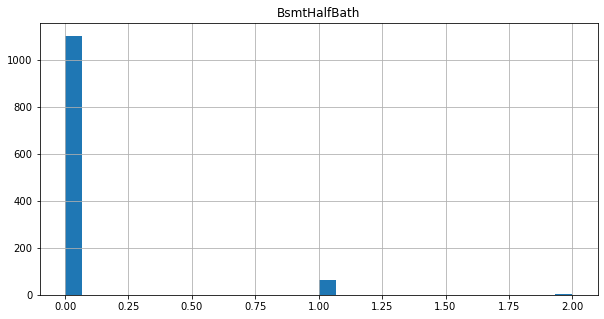

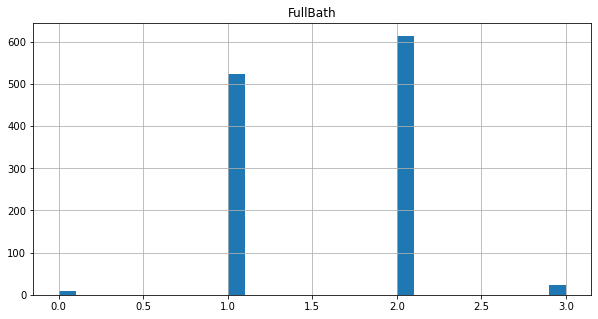

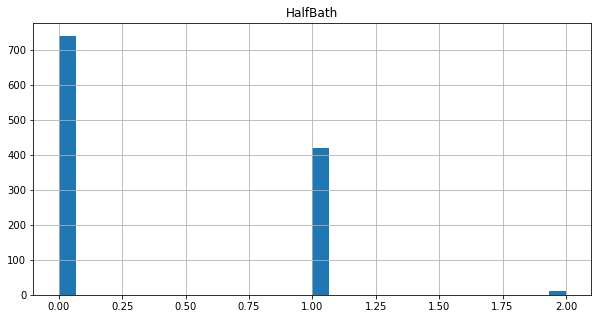

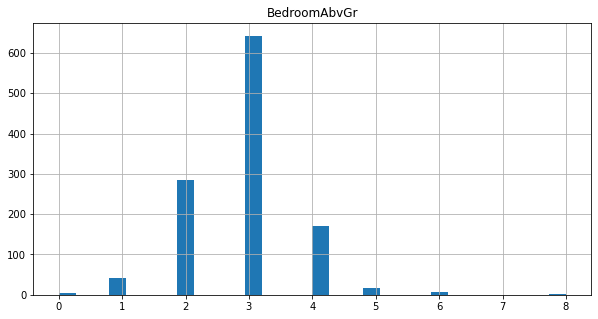

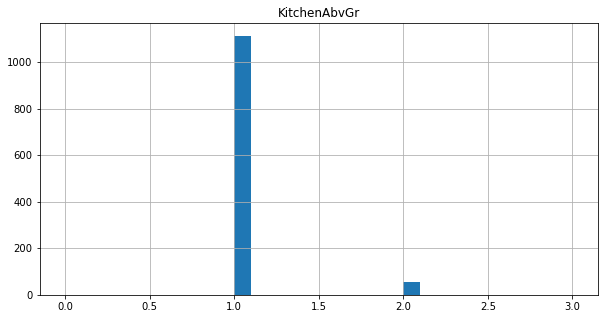

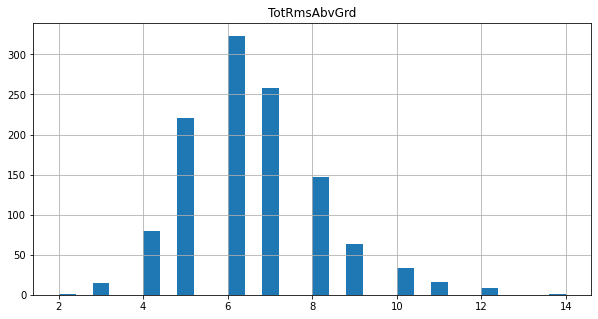

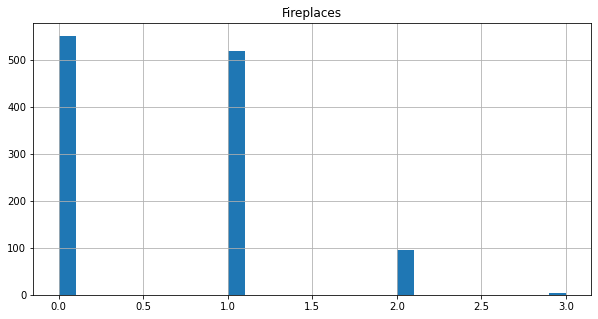

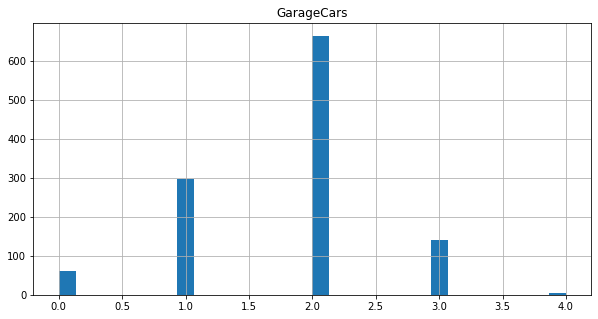

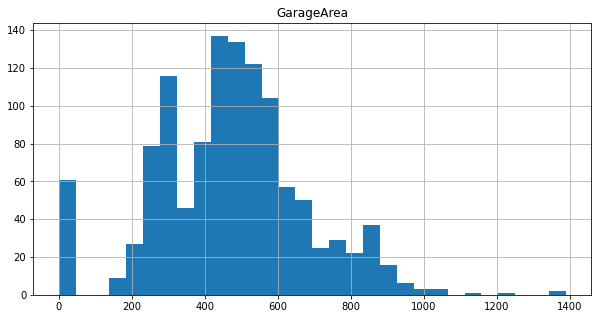

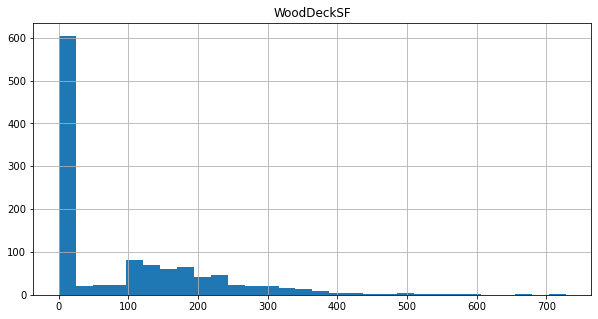

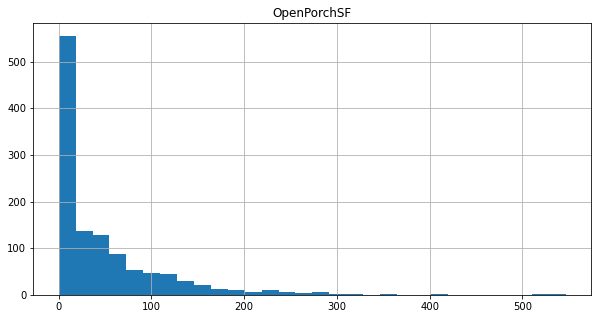

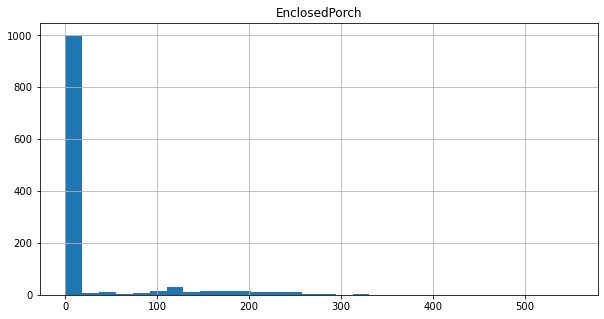

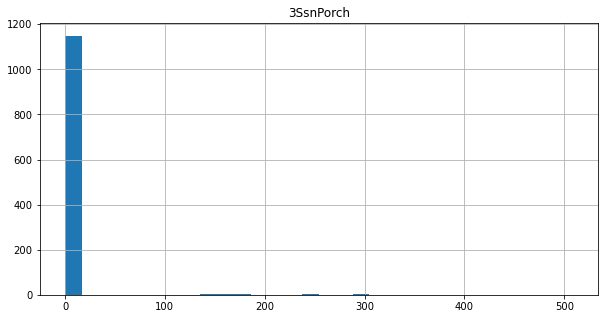

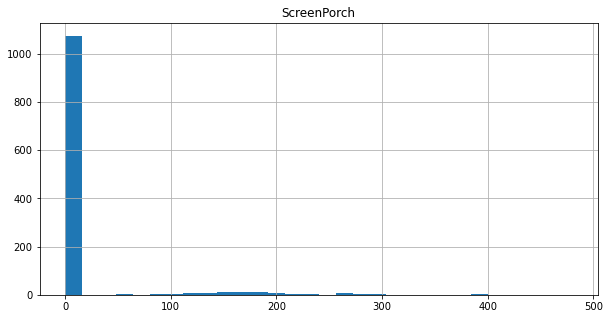

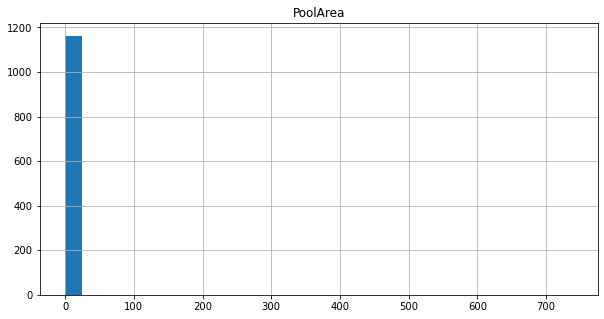

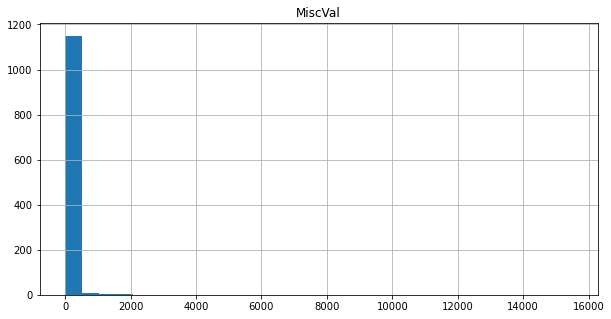

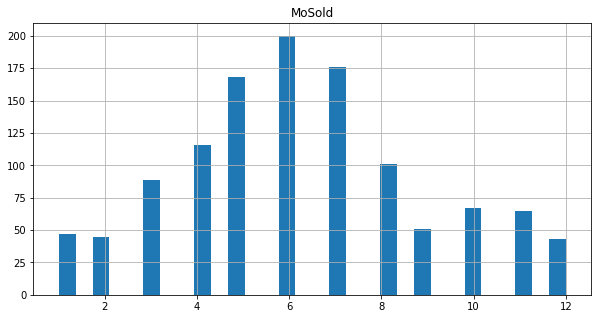

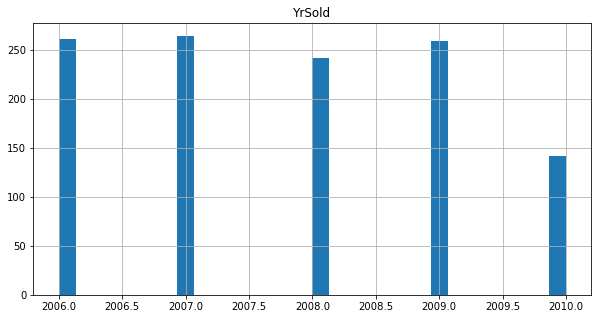

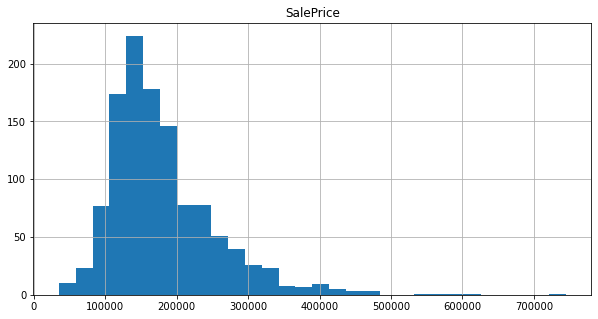

In [25]:
numeric_cols = df.dtypes[df.dtypes.apply(lambda x: x in ['int64', 'float64'])].index[1:]
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    df[col].hist(bins=30)
    plt.title(col)
    plt.show()

In [ ]:
# 